# Importing Libraries

In [1]:
import regex
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import os
import sklearn 
from datetime import datetime
import gc
from itertools import product
import scipy
import warnings
%matplotlib inline
sns.set()
sns.set_style("whitegrid")
matplotlib.rcParams['figure.dpi'] = 50
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from datetime import datetime
from pandas.api.types import is_categorical_dtype
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import tensorflow as tf

warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings('ignore')

# Initial Data Exploration

Load the datasets

In [2]:
#loading the data from google drive
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning-307/ML project-2/train.csv')
weather_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning-307/ML project-2/weather_train.csv')
building = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning-307/ML project-2/building_metadata.csv')


1-training dataset

train_csv

In [3]:
# Lets explore training dataset and understand the basic information
print("="*70)
print("First Five Rows ","\n")
print(train.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(train.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(train.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(train.isnull().sum(),"\n")

First Five Rows  

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB
None 

Describe the Dataset  

        building_id         meter  meter_reading
count  2.021610e+07  2.021610e+07   2.021610e+07
mean   7.992780e+02  6.624412e-01   2.117121e+03
std    4.269133e+02  9.309921e-01   1.532356e+05
min    0.000000e+00  0.000000e

This dataset has four features which contains data about type of meter and the meter reading taken from different bulidings in paticular time.

building_id - Foreign key for the building metadata.

meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.

timestamp - When the measurement was taken

meter_reading - The target variable. Energy consumption in kWh (or equivalent)

2- Weather Dataset

Weather_train.csv

In [4]:
# Lets explore weather dataset and understand the basic information
print("="*70)
print("First Five Rows ","\n")
print(weather_train.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(weather_train.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(weather_train.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(weather_train.isnull().sum(),"\n")

First Five Rows  

   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-01 01:00:00             24.4             NaN   
2        0  2016-01-01 02:00:00             22.8             2.0   
3        0  2016-01-01 03:00:00             21.1             2.0   
4        0  2016-01-01 04:00:00             20.0             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   
1             21.1               -1.0              1020.2            70.0   
2             21.1                0.0              1020.2             0.0   
3             20.6                0.0              1020.1             0.0   
4             20.0               -1.0              1020.0           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6   

Information

This weather_train/test.csv contains ten feature of weather datapoints with respect to time and the site(location)

site_id - site number 

air_temperature - Degrees Celsius

cloud_coverage - Portion of the sky covered in clouds, in oktas

dew_temperature - Degrees Celsius

precip_depth_1_hr - Millimeters

sea_level_pressure - Millibar/hectopascals

wind_direction - Compass direction (0-360)

wind_speed - Meters per second


3-Building dataset

In [5]:
# Lets explore Building dataset and understand the basic information
print("="*70)
print("First Five Rows ","\n")
print(building.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(building.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(building.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(building.isnull().sum(),"\n")

First Five Rows  

   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB
No

This building_metadata.csv contains datapoints of the location and the type of property.

site_id - Foreign key for the weather file.

building_id - Foreign key for the training file.

primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions

square_feet - Gross floor area of the building

year_built - Year building was opened

floor_count - Number of floors of the building

# Some useful functions

Additional Function of memory optimization

In [3]:
# Lets implement some python functions to utilization of memory as it's a large dataset.
# We can reduce the memory utilization of each datafrme by modifying the datatype.
#https://www.kaggle.com/kernels/scriptcontent/3684066/download

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    #iterating over every column and finding the type of the column
    for col in df.columns:
      if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
      col_type = df[col].dtype
        
        #If the columns is not object
      if col_type != object:
          #Get the minimum and maximum value
            c_min = df[col].min()
            c_max = df[col].max()
            #If the type is int
            if str(col_type)[:3] == 'int':
              #If the min max values lies with thin the range of int8 type then assign the type as int8
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
              #If the min max values lies with thin the range of int16 type then assign the type as int16 
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
              #If the min max values lies with thin the range of int32 type then assign the type as int32
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
              #If the min max values lies with thin the range of int64 type then assign the type as int64
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
              #If the min max values lies with thin the range of float16 type then assign the type as float16
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
              #If the min max values lies with thin the range of float32 type then assign the type as float32
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
      else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

Pyhton Function to break Timestamp into hour, day, month and the Year.

In [4]:
#We will break the timestamp into hour of the day, day of the week and month of the year

def break_datetime(df):
  df['timestamp']= pd.to_datetime(df['timestamp'])
  df['hour']= np.uint8(df['timestamp'].dt.hour)
  df['day']= np.uint16(df['timestamp'].dt.day)
  df['dayofweek']= np.uint8(df['timestamp'].dt.dayofweek)
  df['month']= np.uint8(df['timestamp'].dt.month)
  df['dayofyear']= np.uint16(df['timestamp'].dt.dayofyear)
 
  df['year']= np.uint16(df['timestamp'].dt.year)
  return df

  train_df= break_datetime(train_df)

In [5]:
train = reduce_mem_usage(train, use_float16=True)

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.84 MB
Decreased by 71.8%


In [6]:
weather_train = reduce_mem_usage(weather_train, use_float16=True)

Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 2.59 MB
Decreased by 73.1%


# Combining Training Datasets Overview

Checking for duplicates before merging datasets

In [7]:
train.duplicated(subset=['building_id','meter','timestamp'], keep=False).any()

False

In [8]:
weather_train.duplicated(subset=['site_id','timestamp'], keep=False).any()

False

In [9]:
building.duplicated(subset=['building_id'], keep=False).any()

False

Merging the datasets into one dataset with repect to timestamp, site_id and building id(comman Features)

Training dataset

In [10]:
#We will combine the all the data for train set in a single dataframe and test set in another dataframe
df_train = train.merge(building, how='left', on='building_id')
df_train = df_train.merge(weather_train, how='left', on=['site_id','timestamp'])

Final training datafrme overview

In [14]:
# Lets see the dataframe basics again after merger.
print("="*70)
print("First Five Rows ","\n")
print(df_train.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(df_train.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(df_train.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(df_train.isnull().sum(),"\n")

First Five Rows  

   building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            1      0  2016-01-01 00:00:00            0.0        0   
2            2      0  2016-01-01 00:00:00            0.0        0   
3            3      0  2016-01-01 00:00:00            0.0        0   
4            4      0  2016-01-01 00:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   
1   Education         2720      2004.0          NaN             25.0   
2   Education         5376      1991.0          NaN             25.0   
3   Education        23685      2002.0          NaN             25.0   
4   Education       116607      1975.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                

We can observe some missing values lets deal with them after EDA

Optimising the memory by deleting parent dataframes

In [15]:
del train,weather_train,building
gc.collect()

NameError: ignored

Data extraction by the timestamp into year, Month, week, day & hour.

In [12]:
#Lets extract the dataframe by Break_datetime function
df_train = break_datetime(df_train)

In [13]:
# checking for extracted dataframe
df_train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,month,dayofyear,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,1,4,1,1,2016


General Analysis of Modified dataframe

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 22 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         int16   
 1   meter               int8    
 2   timestamp           category
 3   meter_reading       float32 
 4   site_id             int64   
 5   primary_use         object  
 6   square_feet         int64   
 7   year_built          float64 
 8   floor_count         float64 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
 16  hour                uint8   
 17  day                 uint16  
 18  dayofweek           uint8   
 19  month               uint8   
 20  dayofyear           uint16  
 21  year                uint16  
dtypes: category(1), float16(7), float32(1), float64(2), int16(1), in

Now we have 21 features in total in our training dataframe

In [19]:
df_train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,month,dayofyear,year
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011944e+07,11390735.0,2.011596e+07,16467077.0,18984431.0,18767052.0,2.007242e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,20216100.0
mean,7.992780e+02,6.624412e-01,2.117122e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150232e+01,1.576123e+01,3.006958e+00,6.578453e+00,1.854788e+02,2016.0
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00,6.922017e+00,8.820535e+00,1.997191e+00,3.436662e+00,1.052632e+02,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890625e+01,0.0,-3.500000e+01,-1.0,968.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2016.0
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00,8.601562e+00,0.0,0.000000e+00,0.0,1011.5,70.0,2.099609e+00,6.000000e+00,8.000000e+00,1.000000e+00,4.000000e+00,9.600000e+01,2016.0
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00,1.670312e+01,0.0,8.898438e+00,0.0,1016.0,180.0,3.099609e+00,1.200000e+01,1.600000e+01,3.000000e+00,7.000000e+00,1.860000e+02,2016.0
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00,2.409375e+01,4.0,1.609375e+01,0.0,1020.5,280.0,4.601562e+00,1.800000e+01,2.300000e+01,5.000000e+00,1.000000e+01,2.760000e+02,2016.0
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.718750e+01,9.0,2.609375e+01,343.0,1046.0,360.0,1.900000e+01,2.300000e+01,3.100000e+01,6.000000e+00,1.200000e+01,3.660000e+02,2016.0


In [19]:
#Lets check for period of our datapoints.
# How many Unique Year do we Have in Dataset 
print(df_train.year.unique(),"\n")
print("Train Dataset contains data of year", df_train.year.unique(), "\n")

[2016] 

Train Dataset contains data of year [2016] 



In [20]:
# How many Unique Months do we Have in Dataset 
print(df_train.month.unique(),"\n")
print("Total Number of Unique Months", df_train.month.nunique(), "\n")

[ 1  2  3  4  5  6  7  8  9 10 11 12] 

Total Number of Unique Months 12 



We can clearly observe that our data points are collected over one year for the trainng sataset

In [13]:
# Lets use function again to reduce memory utilization of modified dataframe
df_train = reduce_mem_usage(df_train, use_float16=True)

Memory usage of dataframe is 1542.69 MB
Memory usage after optimization is: 1022.14 MB
Decreased by 33.7%


In [14]:
gc.collect()

0

# Data Exploration and preprocessing

1-Visializing distribution of each feature in dataframe

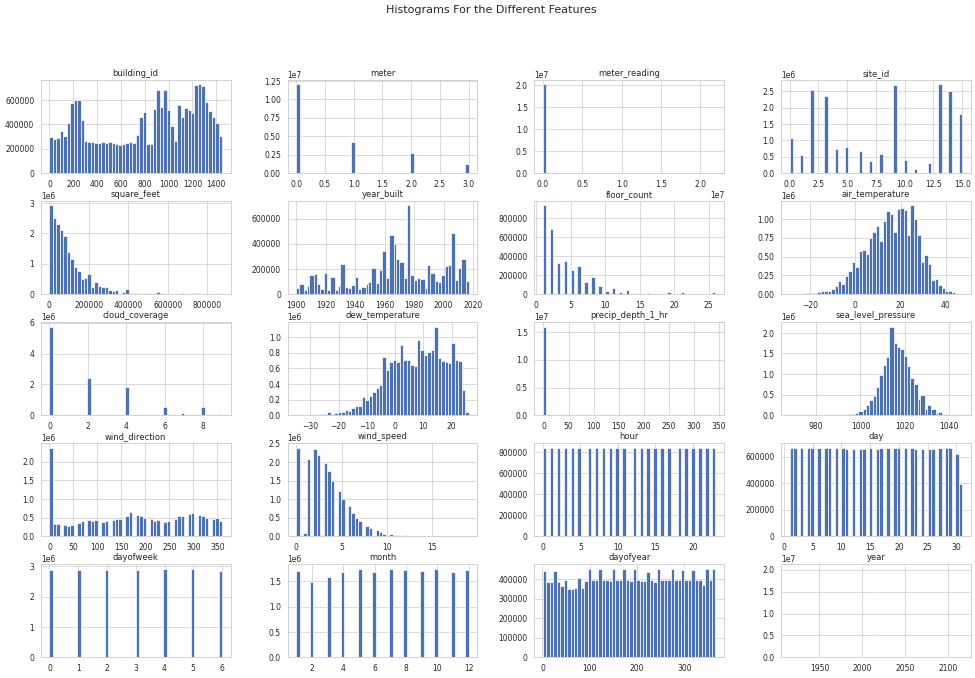

In [29]:
# Lets observe the distribution of each feature
df_train.hist(bins=50, figsize=(24,16))
plt.suptitle('Histograms For the Different Features', fontsize=16)
plt.show()

Observation- we can observe the distribution of each feature seperatly where we notice some of feature has skewed distribution which needs to be observed carefully.

2-Checking for Outliers in training dataframe

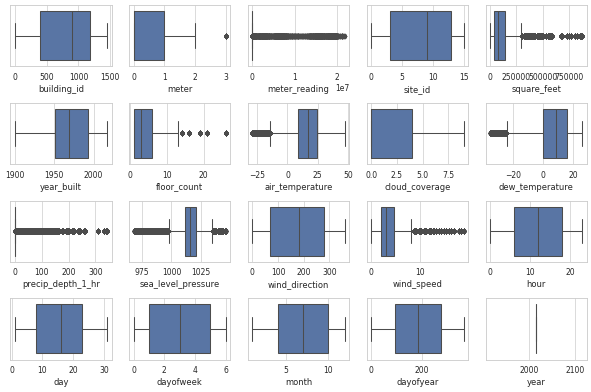

In [31]:
# Checking for outlires in the staset by each feature
plt.figure(figsize=(12,8))

for i, col in enumerate(df_train.describe().columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(x=df_train[col])
    plt.tight_layout()
    
plt.show()

Observation-
Here our target variable Meter reading has outliers  as well as some other important feature also has some outliers. Lets check them individually

3- Corelation between the features to better understanding of data

<Axes: >

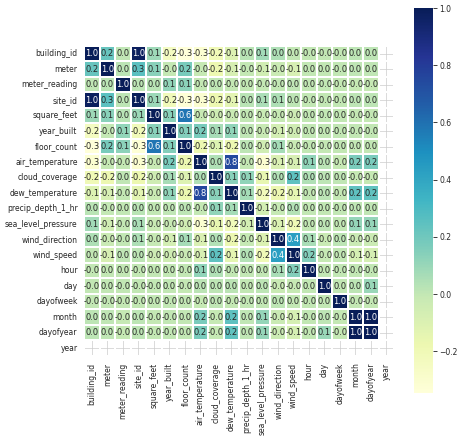

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),square=True,vmax=1,annot=True,fmt='.1f',linewidths=0.3, cmap="YlGnBu")

4- Checking proportion of Missing values per feature

In [23]:
# Lets check for missing values in the dataframe
df_train.isna().sum()*100/len(df_train)

building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            59.990033
floor_count           82.652772
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
hour                   0.000000
day                    0.000000
dayofweek              0.000000
month                  0.000000
dayofyear              0.000000
year                   0.000000
dtype: float64

Observation:

We can see there are three type of groups we can form like 

1- Features with major proportion of missing values - floor_count, year_built

2- Columns with moderate missing values - cloud_coverage, sea_level_pressure, precip_depth_hr, wind_direction

3- columns with minor missing values - air_temperature, wind_speed, dew_temperature

# Analysis of target variable with respect to other variables.

1- Meter

Exploring Types of meter and Proportion of the datapoints

In [24]:
# Lets see the unique values of this feature
print("Total unique values are",df_train.meter.nunique(),"\n")
print(df_train.meter.value_counts())

Total unique values are 4 

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64


Lets Specify the meter by category.

In [26]:
# rename for meter types from the description
df_train['meter'] = pd.Categorical(df_train['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})
print("Total unique values are",df_train.meter.nunique(),"\n")
print(df_train.meter.value_counts())

Total unique values are 4 

electricity     12060910
chilledwater     4182440
steam            2708713
hotwater         1264037
Name: meter, dtype: int64


Exploration of data proportion by Metertype

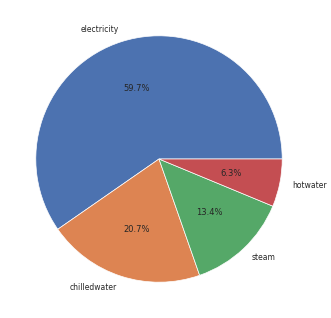

In [27]:
# Lets plot the propotion of readings by each meter
plt.figure(figsize=(10,8))
plt.pie(df_train['meter'].value_counts().values,explode=[0,0,0,0],labels=df_train['meter'].value_counts().index,autopct='%.1f%%')
plt.show()

Observation: Proportion of data is more through Electricity then other forms like chilled water, steam, hotwater.




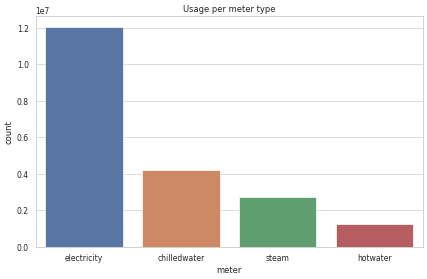

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='meter',data=df_train).set(title='Usage per meter type')
plt.xticks(rotation=0)
plt.show()

2-Meter Reading(target variable)

In [28]:
# Lets find some values of meter reading
print("Total unique values are",df_train.meter_reading.nunique(),"\n")
print(df_train.meter_reading.value_counts())

Total unique values are 1688175 

0.000000      1873976
20.000000       23363
2.930700        23181
36.599998       22154
8.792100        21787
               ...   
27.803101           1
58.975101           1
90.488403           1
370.938995          1
55.624100           1
Name: meter_reading, Length: 1688175, dtype: int64


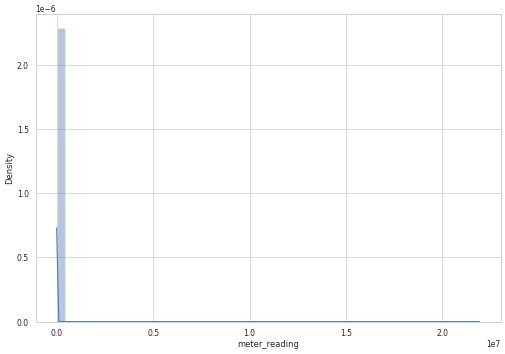

Meter Reading has a skewness of 104.81131


In [59]:
# Lets plot the distribution of meter reading feature
plt.figure(figsize=(12,8))
sns.distplot(df_train['meter_reading'])
plt.show()
print('Meter Reading has a skewness of', df_train['meter_reading'].skew())

Observation:
The Meter Reading is extremely skewed to the left. Majority reading is showing zero.
We need to apply log tranformation to fix the skewness.

In [25]:
df_log_reading = np.log1p(df_train['meter_reading'])

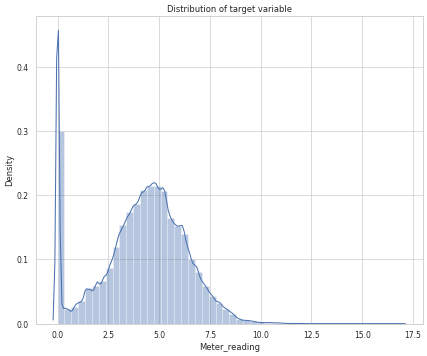

In [26]:
# lets see the distribution after applying log transformation
plt.figure(figsize=(12,8))
sns.distplot(df_log_reading)
plt.xlabel("Meter_reading")
plt.title("Distribution of target variable")
plt.show()

Observations:
The most recurrent meter reading is zero. and now has good variance after transformation, we can observe the diffrent data points now.

In [29]:
gc.collect()

2780

Average Meter reading by Hour throughout the day.

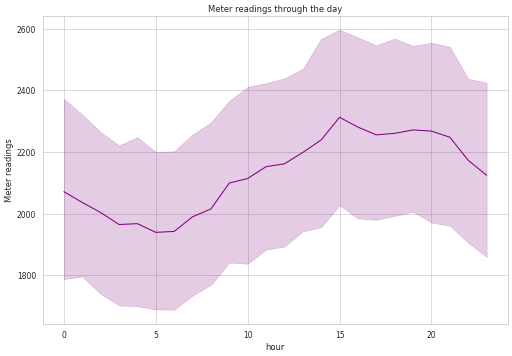

In [30]:
#Lets check the hour wise usage of power
plt.figure(figsize=(12,8))
hour_df= df_train.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['meter_reading'], color='purple')
plt.ylabel("Meter readings")
plt.title("Meter readings through the day")
plt.show()

Observation: We can analyse thar average Energy consption in more in day time as compare to night which is normal.

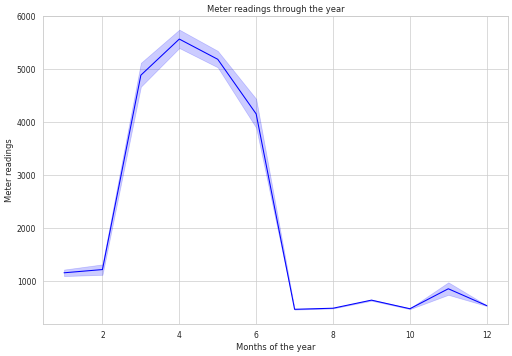

In [31]:
#Lets check the month wise usage of power
plt.figure(figsize=(12,8))
month_df= df_train.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.lineplot(x=month_df['month'], y=month_df['meter_reading'], color='blue')
plt.xlabel("Months of the year")
plt.ylabel("Meter readings")
plt.title("Meter readings through the year")
plt.show()

Obervation: We can predict the Energy consumption pattern for entire year as it should be max in winter but it seems diffrent pattern here. 
lets check for outliers and deal them first.

Energy consumption by Meters

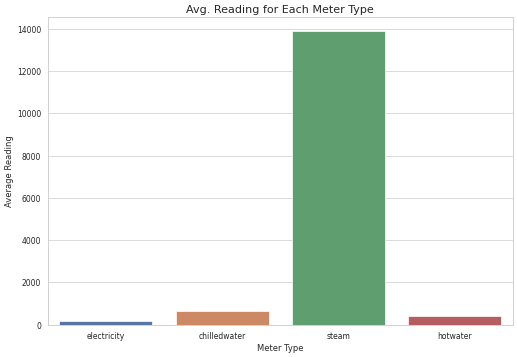

In [32]:
# lets see energy consumption by meter
fig, ax = plt.subplots(figsize=(12,8))
meter_types = df_train.groupby('meter').meter_reading.mean().reset_index()
sns.barplot(x ='meter', y ='meter_reading', data = meter_types).set_title("Avg. Reading for Each Meter Type", fontsize=16)
plt.xlabel('Meter Type', fontsize=12)
plt.ylabel('Average Reading', fontsize=12)
plt.show()

It seems steam meter has high readings which is quite suspicious here.

Checking for Outliers for meter and the Meter reading.

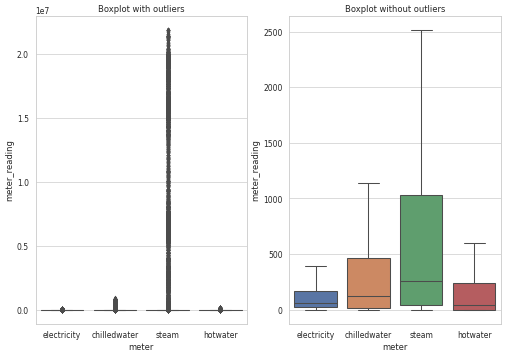

In [33]:
# lets check in through Box plot for meter feature by meter reading.
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(x='meter', y='meter_reading', data=df_train, ax=axes[0]).set(title='Boxplot with outliers');
sns.boxplot(x='meter', y='meter_reading', data=df_train, ax=axes[1], showfliers=False).set(title='Boxplot without outliers');

Observation: we can observe Outliers in meter-2(steam)

 Average Meter Reading by Site-Id

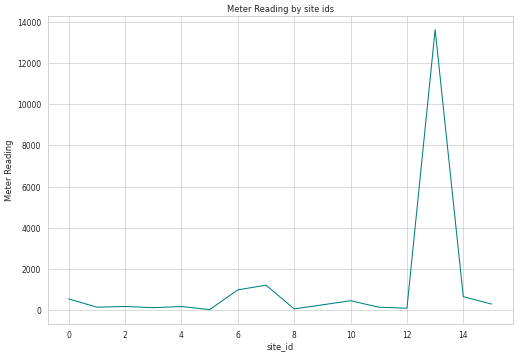

In [34]:
# we can see meter reading per site
plt.figure(figsize=(12,8))
floor_df= df_train.groupby('site_id').meter_reading.mean().reset_index()
sns.lineplot(x=floor_df['site_id'], y=floor_df['meter_reading'], color='teal')
plt.ylabel("Meter Reading")
plt.title("Meter Reading by site ids")
plt.show()

Observation: its shows huge spike at site id 13.It can be outlier

3- Site id

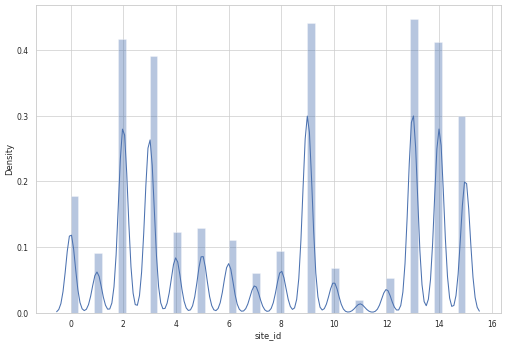

In [32]:
# lets plot desity plot for site id
plt.figure(figsize=(12,8))
sns.distplot(df_train['site_id'])
plt.show()

Site-wise Average consumption

In [ ]:
print(df_train.site_id.value_counts())
print("Total unique values are",df_train.site_id.nunique(),"\n")

13    2711763
9     2679323
2     2530312
14    2501506
3     2370097
15    1815054
0     1076662
5      781776
4      746746
6      668133
8      567915
1      553357
10     411407
7      366681
12     315909
11     119459
Name: site_id, dtype: int64
Total unique values are 16 



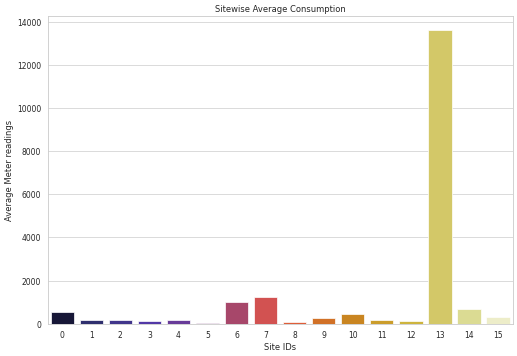

In [32]:
#Sitewide consumption by meter reading
plt.figure(figsize=(12,8))
site_df= df_train.groupby(['site_id']).meter_reading.mean().reset_index()
sns.barplot(x=site_df['site_id'], y=site_df['meter_reading'], palette='CMRmap')
plt.ylabel("Average Meter readings")
plt.xlabel("Site IDs")
plt.title("Sitewise Average Consumption")
plt.show()

we can identify this site_id ==13 had very diffrent value it can be out lier.

Site-wise Hourly consumption

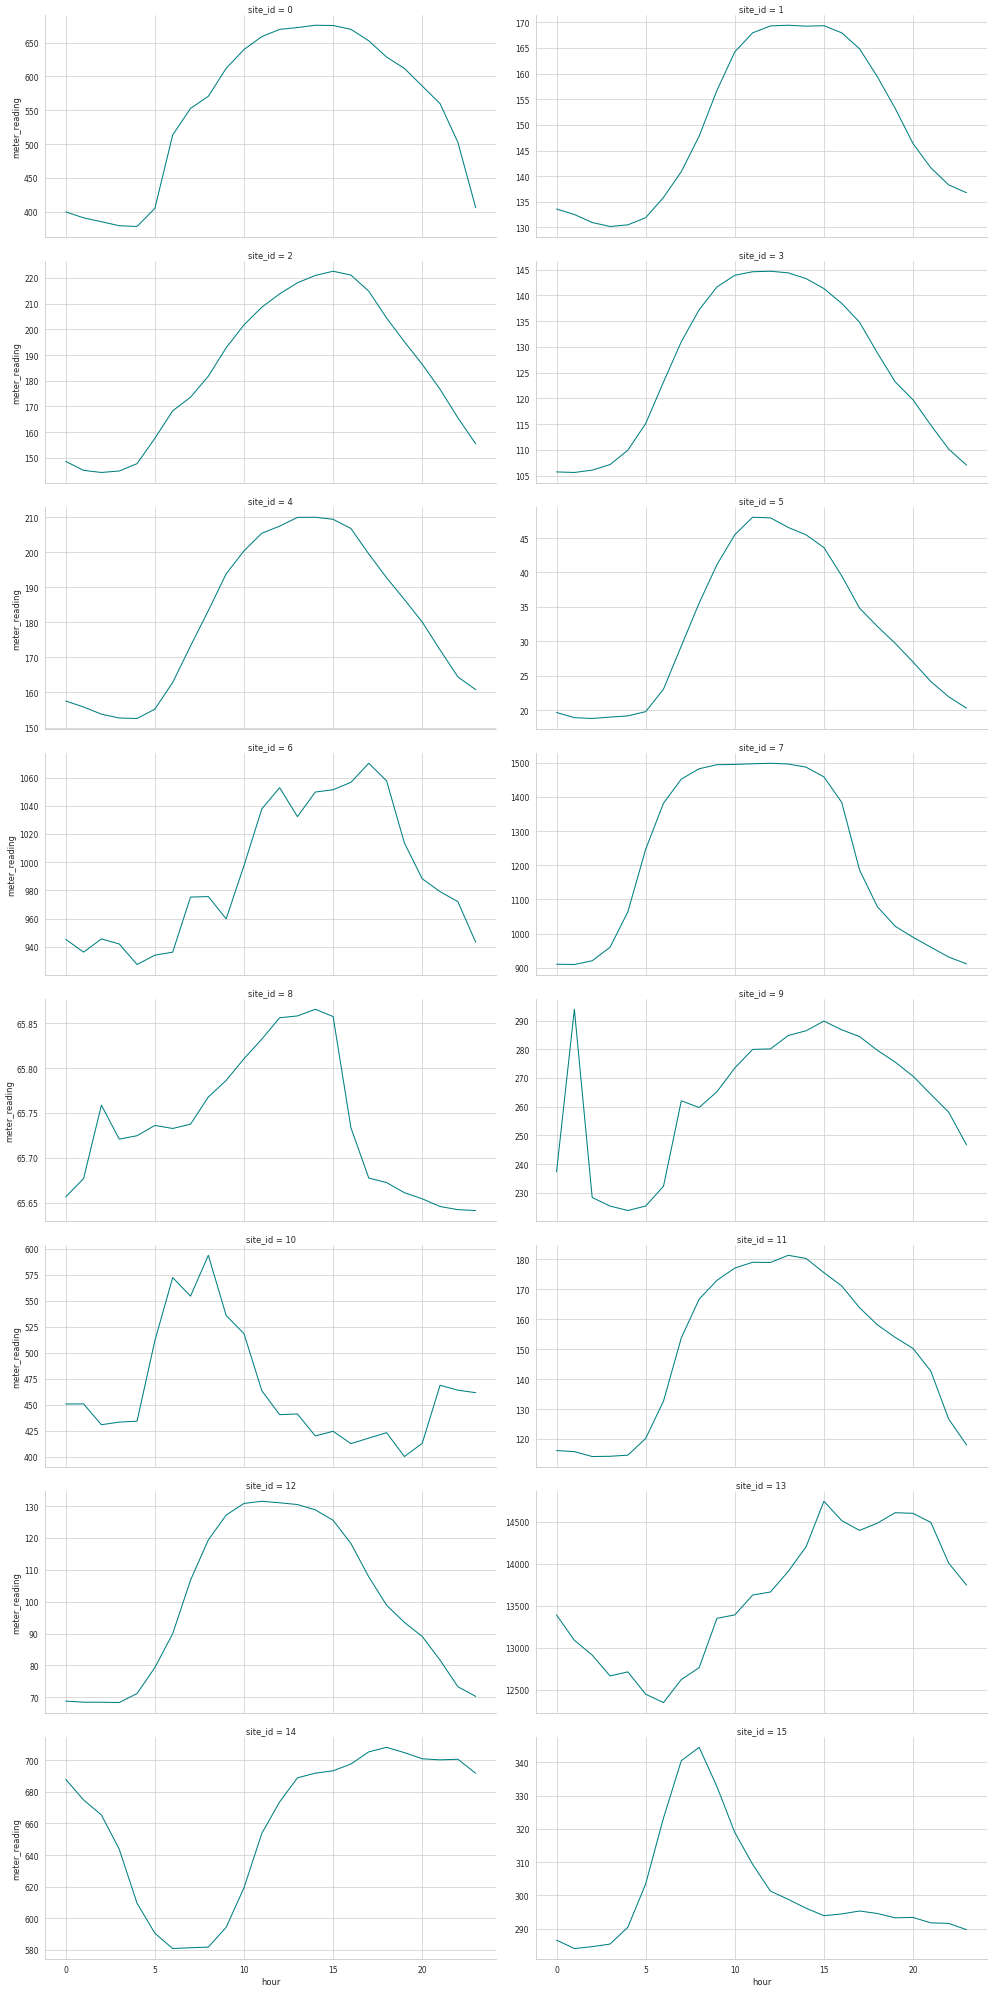

In [33]:
# Lets see site wise hourly energy consumption
hour_site_df= df_train.groupby(['site_id', 'hour']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_site_df, col='site_id', col_wrap=2, height=5, aspect=2, sharey=False)
p.map(sns.lineplot, 'hour', 'meter_reading', color='teal')
plt.show()

Observation:In this also we can clearly see the site_id ==13 has very large values by the meter.

Building wise Average Energy Consumption.



4-Building Id

In [35]:
# checking for unique values in building feature
print(df_train.building_id.value_counts())
print("Total unique values are",df_train.building_id.nunique(),"\n")

1298    35136
1249    35136
1301    35128
1241    35116
1296    35115
        ...  
783      2657
420      2327
53       1685
604      1012
403       479
Name: building_id, Length: 1449, dtype: int64
Total unique values are 1449 



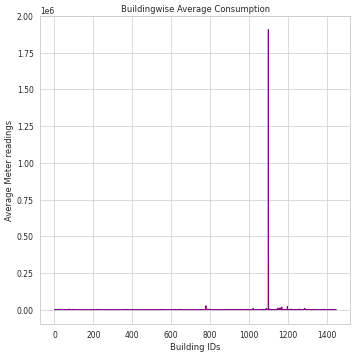

In [36]:
# lets see Building wise energy consumption
plt.figure(figsize=(10,8))
building_df= df_train.groupby(['building_id']).meter_reading.mean().reset_index()
sns.lineplot(x=building_df['building_id'], y=building_df['meter_reading'], color='purple')
plt.ylabel("Average Meter readings")
plt.xlabel("Building IDs")
plt.title("Buildingwise Average Consumption")
plt.show()

Hence we can also observe the same pattern of large reading  in single building as outlier presence.

5- Primary Usage count plot

In [42]:
print("Total unique values are",df_train.primary_use.nunique(),"\n")
print(df_train.primary_use.value_counts())

Total unique values are 16 

Education                        8147938
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64


<Axes: xlabel='count', ylabel='primary_use'>

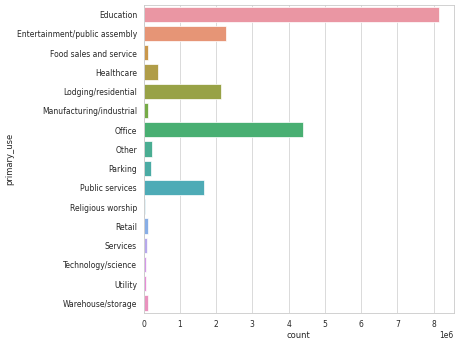

In [43]:
#Primary usage plots
#Count plot for each primary usage category
plt.figure(figsize=(10,8))
sns.countplot(y='primary_use', data=df_train)

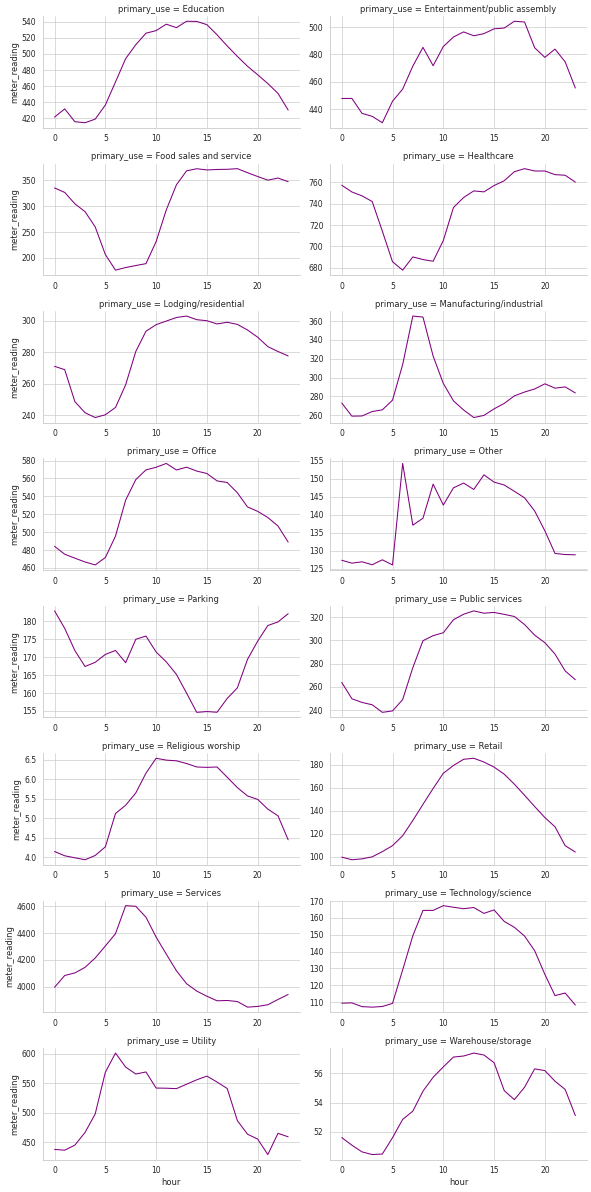

In [44]:
#Hourly average readings based on type of Usage type.
hour_use_df= df_train.groupby(['hour', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'hour', 'meter_reading', color='purple')
plt.show()

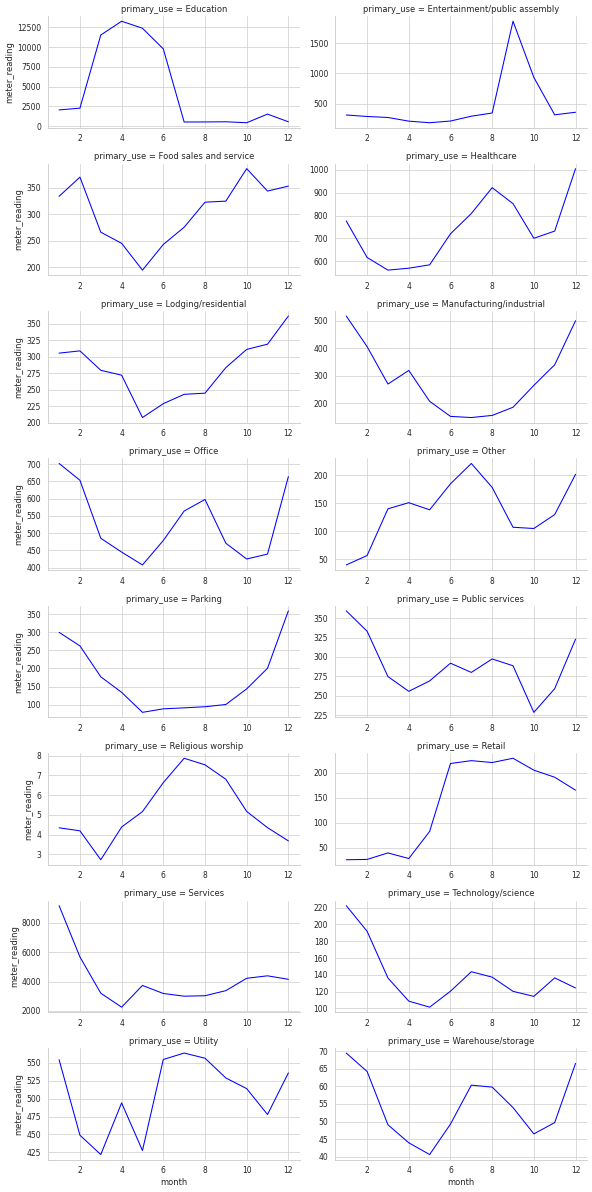

In [35]:
# Monthly average readings based on type of Usage type.
hour_use_df= df_train.groupby(['month', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'month', 'meter_reading', color='blue')
plt.show()

Meter Reading Vs Floors

6-Floor count 

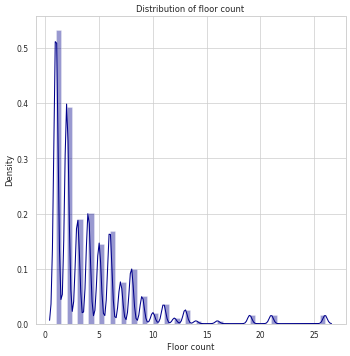

In [46]:
# Density plot for floor count
plt.figure(figsize=(12,8))
sns.distplot(df_train['floor_count'].dropna(), color='darkblue')
plt.xlabel("Floor count")
plt.title("Distribution of floor count")
plt.show()

Observation: many buildings are below five floors

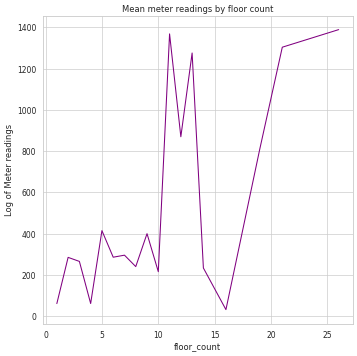

In [47]:
# Lets plot meter reading by floor counts
plt.figure(figsize=(12,8))
floor_df= df_train.groupby('floor_count').meter_reading.mean().reset_index()
sns.lineplot(x=floor_df['floor_count'], y=floor_df['meter_reading'], color='purple')
plt.ylabel("Meter readings")
plt.title("Mean meter readings by floor count")
plt.show()

Observation: Energy Consuption increases as floor count increases.

Meter Reading Vs Year Built

7-Year Built

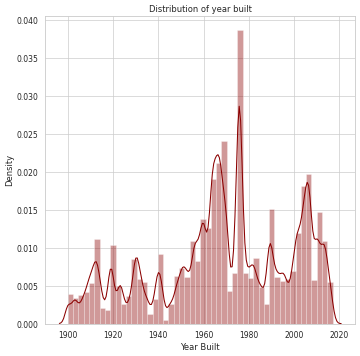

In [61]:
# Lets plot density plot for built year of the properties
plt.figure(figsize=(12,8))
sns.distplot(df_train['year_built'].dropna(), color='darkred')
plt.xlabel("Year Built")
plt.title("Distribution of year built")
plt.show()

Mean meter readings by year built

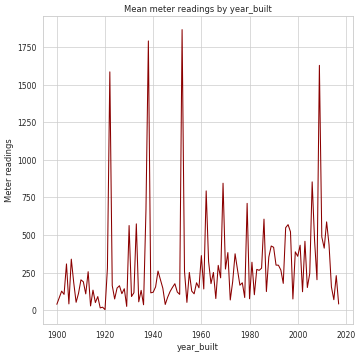

In [48]:
# meter reading by properties built year
plt.figure(figsize=(12,8))
yearbuilt_df= df_train.groupby('year_built').meter_reading.mean().reset_index()
sns.lineplot(x=yearbuilt_df['year_built'], y=yearbuilt_df['meter_reading'], color='darkred')
plt.ylabel("Meter readings")
plt.title("Mean meter readings by year_built")
plt.show()

Energy Consumption is more in older buildings as the type of stucture.

Meter reading Vs Area- Square feet

8- Square feet

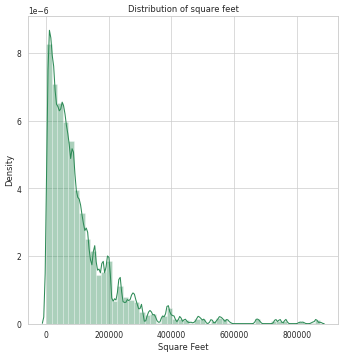

In [49]:
# density plot for square feet feature
plt.figure(figsize=(12,8))
sns.distplot(df_train['square_feet'], color='seagreen')
plt.xlabel("Square Feet")
plt.title("Distribution of square feet")
plt.show()

As the square feet is also heavily skewed and the scale of values is also very large hence we will apply a log transformation here and plot the distribution.

In [50]:
df_train['square_feet']=np.log1p(df_train['square_feet'])

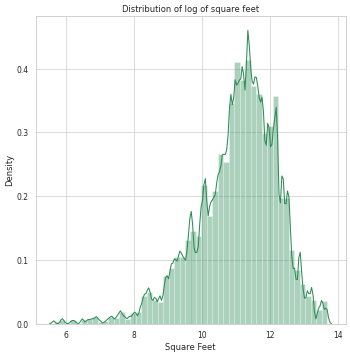

In [51]:
# lets observe the distribution after log transformation
plt.figure(figsize=(12,8))
sns.distplot(df_train['square_feet'], color='seagreen')
plt.xlabel("Square Feet")
plt.title("Distribution of log of square feet")
plt.show()

Meter reading by per Square feet usage.

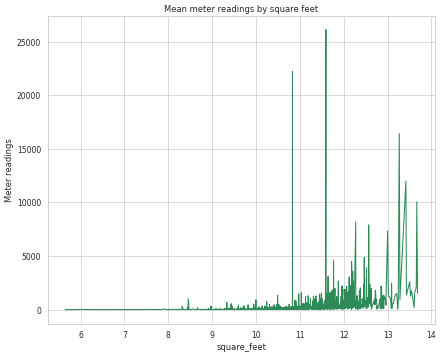

In [53]:
# meter reading by square foot usage
plt.figure(figsize=(12,8))
sqfeet_df= df_train.groupby('square_feet').meter_reading.mean().reset_index()
sns.lineplot(x=sqfeet_df['square_feet'], y=sqfeet_df['meter_reading'], color='seagreen')
plt.ylabel("Meter readings")
plt.title("Mean meter readings by square feet")
plt.show()

We can observe meter readings are more for bigger surface area.

# Other weather feature Exploration 

9-Air temperature

In [ ]:
print("Total unique values are",df_train.air_temperature.nunique(),"\n")
print(df_train.air_temperature.value_counts())

Total unique values are 619 

 24.406250    395697
 25.000000    385535
 25.593750    381761
 20.000000    379116
 23.296875    379113
               ...  
 33.593750        55
 33.687500        55
-23.406250        53
-21.203125        48
-18.500000        48
Name: air_temperature, Length: 619, dtype: int64


Air temeprature feature exploration

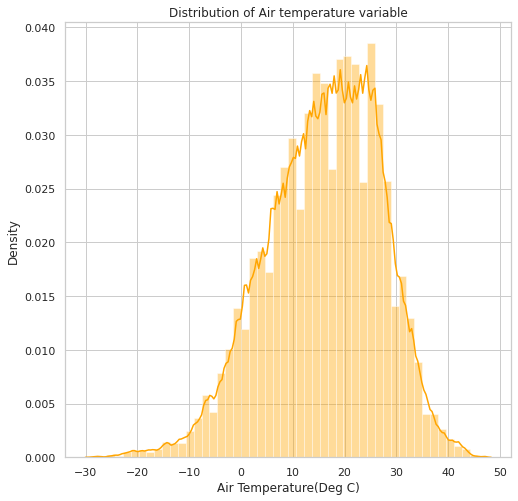

In [ ]:
# Lets check Distribution of Air temperature because its directly propotional to energy usage
plt.figure(figsize=(12,8))
sns.distplot(df_train['air_temperature'].dropna(), color='orange')
plt.xlabel("Air Temperature(Deg C)")
plt.title("Distribution of Air temperature variable")
plt.show()

Observation: its shows its Normally distributed and avg temperature is lie between 0-30 degree celcius. 

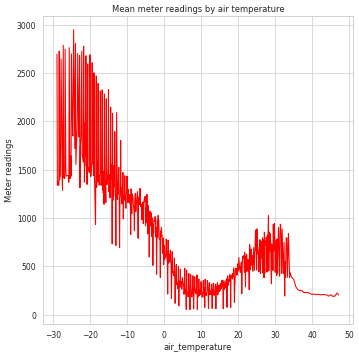

In [54]:
# meter reading by air temperature
plt.figure(figsize=(12,8))
temp_df= df_train.groupby('air_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['air_temperature'], y=temp_df['meter_reading'], color='red')
plt.ylabel("Meter readings")
plt.title("Mean meter readings by air temperature")
plt.show()

Observation: we can observe clearly the meter reading increases as temperature is neagtive and vice-versa for higher temperature.
hence we can conclude that more enregy consption in winter.

10-Dew temperature feature Exploration

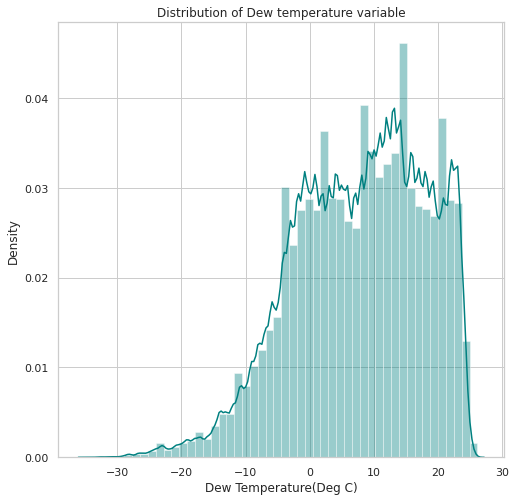

In [ ]:
# density plot of dew temperature
plt.figure(figsize=(12,8))
sns.distplot(df_train['dew_temperature'].dropna(), color='teal')
plt.xlabel("Dew Temperature(Deg C)")
plt.title("Distribution of Dew temperature variable")
plt.show()

Observation: it is rightly skewed anf most of the data values lies between 5-25 degree celcius.

11-Cloud Coverage

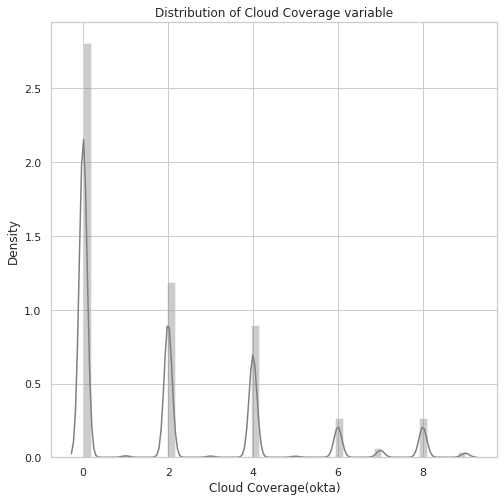

In [ ]:
# density plot for cloud coverage
plt.figure(figsize=(12,8))
sns.distplot(df_train['cloud_coverage'], color='grey')
plt.xlabel("Cloud Coverage(okta)")
plt.title("Distribution of Cloud Coverage variable")
plt.show()

Majority of the observations have cloud coverage as 0. There are lot of missing values in cloud coverage. We will impute them later.

12-Precipitation depth

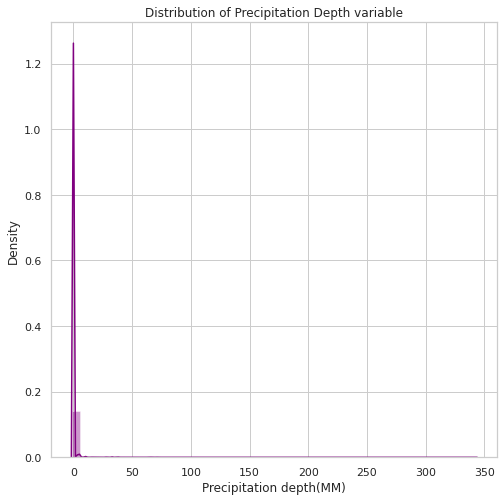

In [ ]:
# density plot of perciption depth
plt.figure(figsize=(12,8))
sns.distplot(df_train['precip_depth_1_hr'], color='purple')
plt.xlabel("Precipitation depth(MM)")
plt.title("Distribution of Precipitation Depth variable")
plt.show()

The data is heavily skewed with maximum observations recording zero. Also there are lot of missing values in this variable.

13-Sea level pressure

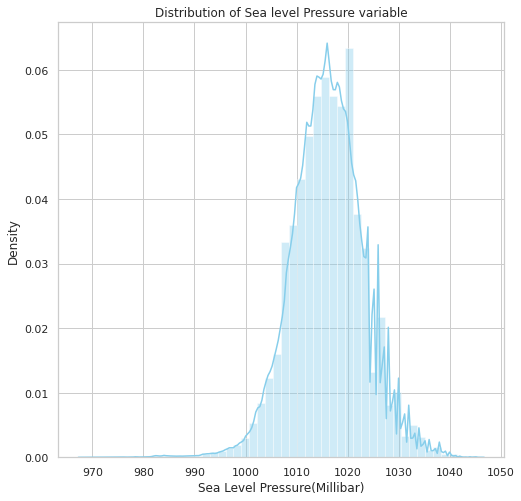

In [ ]:
# density plot for Sea level pressure
plt.figure(figsize=(12,8))
sns.distplot(df_train['sea_level_pressure'], color='skyblue')
plt.xlabel("Sea Level Pressure(Millibar)")
plt.title("Distribution of Sea level Pressure variable")
plt.show()

This follows a normal distribution with maximum of the observations lying between 1000 to 1030 millibar.

# feature engineering
 Dealing with missing values

In [16]:
# lets check for missing values proportion 
df_train.isna().sum()*100/len(df_train)

building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            59.990033
floor_count           82.652772
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
hour                   0.000000
day                    0.000000
dayofweek              0.000000
month                  0.000000
dayofyear              0.000000
year                   0.000000
dtype: float64

1- Columns with major Missing counts 
   We can drop the these columns as we can't replace the values with duplicate values which will affect our model.

In [16]:
df_train.drop(['floor_count','year_built'],axis=1,inplace= True)

2- Columns with moderate missing values.
   we can replace missing values using fill function. 

In [17]:
df_train['cloud_coverage'].fillna(df_train['cloud_coverage'].median(), inplace=True)
df_train['sea_level_pressure'].fillna(df_train['sea_level_pressure'].median(), inplace=True)
df_train['precip_depth_1_hr'].fillna(df_train['precip_depth_1_hr'].median(), inplace=True)
df_train['wind_direction'].fillna(df_train['wind_direction'].median(), inplace=True)

3- columns with minor missing values. 
   We can drop that rows as it is less then < 5% portion will not affect much.

In [18]:
df_train = df_train.dropna(subset=['air_temperature'])
df_train = df_train.dropna(subset=['wind_speed'])
df_train = df_train.dropna(subset=['dew_temperature'])

In [19]:
df_train.isna().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hour                  0
day                   0
dayofweek             0
month                 0
dayofyear             0
year                  0
dtype: int64

In [20]:
gc.collect()

247

Outlier removal

In [41]:
#Lets identify outlier present in the data frame
print(df_train[df_train.meter_reading == df_train.meter_reading.max()])

         building_id  meter           timestamp  meter_reading  site_id  \
8907488         1099  steam 2016-06-13 09:00:00     21904700.0       13   

        primary_use  square_feet  air_temperature  cloud_coverage  \
8907488   Education       332884         19.40625             0.0   

         dew_temperature  precip_depth_1_hr  sea_level_pressure  \
8907488        17.203125                0.0              1014.5   

         wind_direction  wind_speed  hour   day  dayofweek  month  dayofyear  \
8907488            50.0    6.199219   9.0  13.0        0.0    6.0      165.0   

           year  
8907488  2016.0  


After Observation we can conclude that we have Outlier present in Building no-1099 for steam meter. which reflects from the information

In [40]:
df_train[df_train['building_id']==1099]['meter_reading'].describe()

count    1.756200e+04
mean     1.907237e+06
std      4.834319e+06
min      1.440000e+02
25%      5.203910e+02
50%      9.856970e+02
75%      7.008000e+03
max      2.190470e+07
Name: meter_reading, dtype: float64

In [21]:
drop_indices1= list(df_train[df_train['building_id']==1099].index)
df_train.drop(drop_indices1, axis=0, inplace=True)

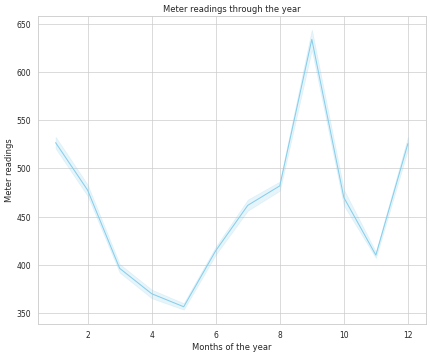

In [43]:
#Lets check the month wise usage of power
plt.figure(figsize=(10,8))
month_df= df_train.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.lineplot(x=month_df['month'], y=month_df['meter_reading'], color='skyblue')
plt.xlabel("Months of the year")
plt.ylabel("Meter readings")
plt.title("Meter readings through the year")
plt.show()

Check again for other outlier if any

In [44]:
print(df_train[df_train.meter_reading == df_train.meter_reading.max()])

          building_id         meter           timestamp  meter_reading  \
13853818          778  chilledwater 2016-09-09 18:00:00       869242.0   

          site_id                    primary_use  square_feet  \
13853818        6  Entertainment/public assembly       108339   

          air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
13853818         34.40625             0.0             20.0                0.0   

          sea_level_pressure  wind_direction  wind_speed  hour  day  \
13853818              1014.0           200.0    4.101562  18.0  9.0   

          dayofweek  month  dayofyear    year  
13853818        4.0    9.0      253.0  2016.0  


In [45]:
df_train[df_train['building_id']==778]['meter_reading'].describe()

count     16759.000000
mean      26095.404297
std      116557.609375
min           0.000000
25%           0.000000
50%         157.632996
75%         265.483490
max      869242.000000
Name: meter_reading, dtype: float64

In [22]:
#removing the observations for building 778
drop_indices2= list(df_train[df_train['building_id']==778].index)
df_train.drop(drop_indices2, axis=0, inplace=True)

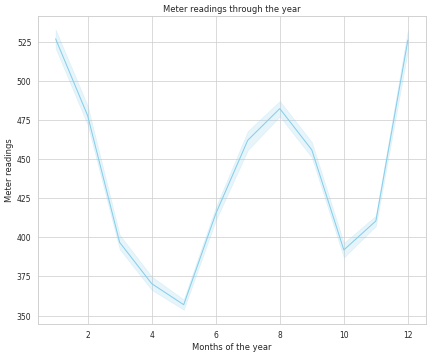

In [47]:
#Lets check the month wise usage of power
plt.figure(figsize=(10,8))
month_df= df_train.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.lineplot(x=month_df['month'], y=month_df['meter_reading'], color='skyblue')
plt.xlabel("Months of the year")
plt.ylabel("Meter readings")
plt.title("Meter readings through the year")
plt.show()

Obervation: After removing outlier we can clearly sse that energy consumtion is more in winter and also some spike in mid summer beacuse max use of heater and Air conditioners.

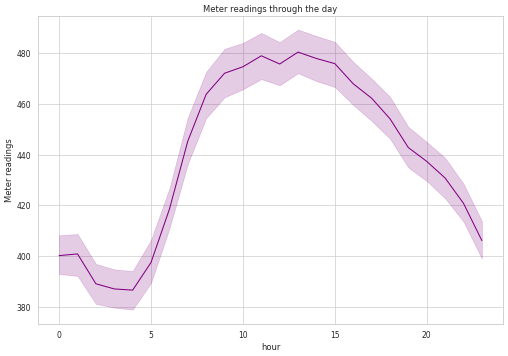

In [48]:
#Lets check the hour wise usage of power
plt.figure(figsize=(12,8))
hour_df= df_train.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['meter_reading'], color='purple')
plt.ylabel("Meter readings")
plt.title("Meter readings through the day")
plt.show()

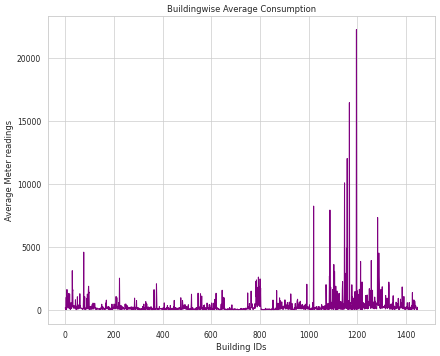

In [46]:
# lets see Building wise energy consumption
plt.figure(figsize=(10,8))
building_df= df_train.groupby(['building_id']).meter_reading.mean().reset_index()
sns.lineplot(x=building_df['building_id'], y=building_df['meter_reading'], color='purple')
plt.ylabel("Average Meter readings")
plt.xlabel("Building IDs")
plt.title("Buildingwise Average Consumption")
plt.show()

Obervation: Now its properly reates with the normal energy sonsumption pattern throughout the day. less in the nights and maximun in daytime.

As we also have huge proportion of 'Zero' in meater reading, we don't really need this values as its big portion we can also drop them.

In [ ]:
#removing the observations with 0 meter_readings
#drop_0readings= list(df_train[df_train['meter_reading']==0.0].index)
#df_train.drop(drop_0readings, axis=0, inplace=True)

Now we again analyse the details of our dataframe.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18188086 entries, 45 to 20216099
Data columns (total 20 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         int16   
 1   meter               int8    
 2   timestamp           category
 3   meter_reading       float32 
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   air_temperature     float16 
 8   cloud_coverage      float16 
 9   dew_temperature     float16 
 10  precip_depth_1_hr   float16 
 11  sea_level_pressure  float16 
 12  wind_direction      float16 
 13  wind_speed          float16 
 14  hour                float16 
 15  day                 float16 
 16  dayofweek           float16 
 17  month               float16 
 18  dayofyear           float16 
 19  year                float16 
dtypes: category(2), float16(13), float32(1), int16(1), int32(1), int8(2)
memory usage: 850.2 MB


In [ ]:
df_train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,month,dayofyear,year
45,46,0,2016-01-01,53.239700,0,Retail,9045,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0.0,1.0,4.0,1.0,1.0,2016.0
72,74,0,2016-01-01,43.001301,0,Parking,387638,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0.0,1.0,4.0,1.0,1.0,2016.0
91,93,0,2016-01-01,52.420601,0,Office,33370,25.000000,6.0,20.000000,0.0,1019.5,0.0,0.000000,0.0,1.0,4.0,1.0,1.0,2016.0
103,105,0,2016-01-01,23.303600,1,Education,50623,3.800781,0.0,2.400391,0.0,1021.0,240.0,3.099609,0.0,1.0,4.0,1.0,1.0,2016.0
104,106,0,2016-01-01,0.374600,1,Education,5374,3.800781,0.0,2.400391,0.0,1021.0,240.0,3.099609,0.0,1.0,4.0,1.0,1.0,2016.0


In [ ]:
df_train.describe()

,building_id,meter,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,month,dayofyear,year
count,1.818809e+07,1.818809e+07,1.818809e+07,1.818809e+07,1.818809e+07,1.818809e+07,18188086.0,1.818809e+07,18188086.0,18188086.0,18188086.0,1.818809e+07,18188086.0,18188086.0,18188086.0,18188086.0,18188086.0,18188086.0
mean,8.023178e+02,5.989240e-01,5.077146e+02,7.999130e+00,1.071171e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.201359e+02,8.937020e-01,4.443051e+03,5.046911e+00,1.168097e+05,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.0,0.0,0.0,0.0,NaN,NaN
min,0.000000e+00,0.000000e+00,1.000000e-04,0.000000e+00,2.830000e+02,-2.890625e+01,0.0,-3.500000e+01,-1.0,968.0,0.0,0.000000e+00,0.0,1.0,0.0,1.0,1.0,2016.0
25%,4.110000e+02,0.000000e+00,2.970000e+01,3.000000e+00,3.131600e+04,8.898438e+00,0.0,6.000977e-01,0.0,1012.0,80.0,2.099609e+00,6.0,8.0,1.0,4.0,100.0,2016.0
50%,8.920000e+02,0.000000e+00,9.769810e+01,9.000000e+00,7.193600e+04,1.670312e+01,0.0,8.898438e+00,0.0,1016.0,180.0,3.099609e+00,12.0,16.0,3.0,7.0,190.0,2016.0
75%,1.178000e+03,1.000000e+00,3.088850e+02,1.300000e+01,1.396830e+05,2.390625e+01,2.0,1.609375e+01,0.0,1020.0,270.0,4.601562e+00,17.0,23.0,5.0,10.0,278.0,2016.0
max,1.448000e+03,3.000000e+00,8.692420e+05,1.500000e+01,8.750000e+05,4.718750e+01,9.0,2.609375e+01,343.0,1046.0,360.0,1.900000e+01,23.0,31.0,6.0,12.0,366.0,2016.0


In [ ]:
df_train.isna().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hour                  0
day                   0
dayofweek             0
month                 0
dayofyear             0
year                  0
dtype: int64

In [23]:
gc.collect()

127

## Test data

In [24]:
#load the data from uploaded file
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning-307/ML project-2/test.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning-307/ML project-2/weather_test.csv')
building = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning-307/ML project-2/building_metadata.csv')

Test dataset

test.csv

In [4]:
print("="*70)
print("First Five Rows ","\n")
print(test.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(test.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(test.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(test.isnull().sum(),"\n")

First Five Rows  

   row_id  building_id  meter            timestamp
0       0            0      0  2017-01-01 00:00:00
1       1            1      0  2017-01-01 00:00:00
2       2            2      0  2017-01-01 00:00:00
3       3            3      0  2017-01-01 00:00:00
4       4            4      0  2017-01-01 00:00:00 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB
None 

Describe the Dataset  

             row_id   building_id         meter
count  4.169760e+07  4.169760e+07  4.169760e+07
mean   2.084880e+07  8.075824e+02  6.642857e-01
std    1.203706e+07  4.297680e+02  9.278067e-01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.042440e+07  4.047500e+02  0.000000e+00
50%    2.084

weather_test.csv

In [5]:
print("="*70)
print("First Five Rows ","\n")
print(weather_test.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(weather_test.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(weather_test.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(weather_test.isnull().sum(),"\n")

First Five Rows  

   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2017-01-01 00:00:00             17.8             4.0   
1        0  2017-01-01 01:00:00             17.8             2.0   
2        0  2017-01-01 02:00:00             16.1             0.0   
3        0  2017-01-01 03:00:00             17.2             0.0   
4        0  2017-01-01 04:00:00             16.7             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             11.7                NaN              1021.4           100.0   
1             12.8                0.0              1022.0           130.0   
2             12.8                0.0              1021.9           140.0   
3             13.3                0.0              1022.2           140.0   
4             13.3                0.0              1022.3           130.0   

   wind_speed  
0         3.6  
1         3.1  
2         3.1  
3         3.1  
4         2.6   

Information

In [25]:
test = reduce_mem_usage(test, use_float16=True)

Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 358.53 MB
Decreased by 71.8%


In [26]:
weather_test = reduce_mem_usage(weather_test, use_float16=True)

Memory usage of dataframe is 19.04 MB
Memory usage after optimization is: 5.13 MB
Decreased by 73.0%


In [27]:
test.duplicated(subset=['building_id','meter','timestamp'], keep=False).any()

False

In [28]:
weather_test.duplicated(subset=['site_id','timestamp'], keep=False).any()

False

In [29]:
# Lets merge the dataframe for test dataset
df_test = test.merge(building, how='left', on='building_id')
df_test = df_test.merge(weather_test, how='left', on=['site_id','timestamp'])

In [30]:
del test,weather_test, building
gc.collect()

52

In [14]:
print("="*70)
print("First Five Rows ","\n")
print(df_test.head(),"\n")

print("="*70)
print("Information About Dataset","\n")
print(df_test.info(),"\n")

print("="*70)
print("Describe the Dataset ","\n")
print(df_test.describe(),"\n")

print("="*70)
print("Null Values t ","\n")
print(df_test.isnull().sum(),"\n")

First Five Rows  

   row_id  building_id  meter            timestamp  site_id primary_use  \
0       0            0      0  2017-01-01 00:00:00        0   Education   
1       1            1      0  2017-01-01 00:00:00        0   Education   
2       2            2      0  2017-01-01 00:00:00        0   Education   
3       3            3      0  2017-01-01 00:00:00        0   Education   
4       4            4      0  2017-01-01 00:00:00        0   Education   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  \
0         7432      2008.0          NaN        17.796875             4.0   
1         2720      2004.0          NaN        17.796875             4.0   
2         5376      1991.0          NaN        17.796875             4.0   
3        23685      2002.0          NaN        17.796875             4.0   
4       116607      1975.0          NaN        17.796875             4.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction

In [15]:
df_test.isna().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64

In [31]:
df_test= break_datetime(df_test)

In [17]:
df_test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,month,dayofyear,year
0,0,0,0,2017-01-01,0,Education,7432,2008.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,1,6,1,1,2017
1,1,1,0,2017-01-01,0,Education,2720,2004.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,1,6,1,1,2017
2,2,2,0,2017-01-01,0,Education,5376,1991.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,1,6,1,1,2017
3,3,3,0,2017-01-01,0,Education,23685,2002.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,1,6,1,1,2017
4,4,4,0,2017-01-01,0,Education,116607,1975.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,1,6,1,1,2017


In [18]:
# How many Unique Year do we Have in Dataset 
print(df_test.year.unique(),"\n")
print("Train Dataset contains data of year", df_test.year.unique(), "\n")

[2017 2018] 

Train Dataset contains data of year [2017 2018] 



In [19]:
# How many Unique Year do we Have in Dataset 
print(df_test.month.unique(),"\n")
print("Total Number of Unique Months", df_test.month.nunique(), "\n")

[ 1  2  3  4  5  6  7  8  9 10 11 12] 

Total Number of Unique Months 12 



In [32]:
df_test= reduce_mem_usage(df_test, use_float16=True)

Memory usage of dataframe is 3181.91 MB
Memory usage after optimization is: 2108.23 MB
Decreased by 33.7%


 Lets drop some period of data to reduce the memory usage while applying the models


In [33]:
# Lets Reduce dataset into one year only-2017
drop_year= list(df_test[df_test['year']==2018].index)
df_test.drop(drop_year, axis=0, inplace=True)

In [34]:
# How many Unique Year do we Have in Dataset 
print(df_test.year.unique(),"\n")
print("Train Dataset contains data of year", df_test.year.unique(), "\n")

[2017.] 

Train Dataset contains data of year [2017.] 



In [ ]:
gc.collect()

Missing values

In [36]:
# lets drop unwanted features same as train dataset
df_test.drop(['floor_count','year_built','row_id'],axis=1,inplace= True)

In [37]:
df_test['cloud_coverage'].fillna(df_test['cloud_coverage'].median(), inplace=True)
df_test['sea_level_pressure'].fillna(df_test['sea_level_pressure'].median(), inplace=True)
df_test['precip_depth_1_hr'].fillna(df_test['precip_depth_1_hr'].median(), inplace=True)
df_test['wind_direction'].fillna(df_test['wind_direction'].median(), inplace=True)

In [38]:
df_test = df_test.dropna(subset=['air_temperature'])
df_test = df_test.dropna(subset=['wind_speed'])
df_test = df_test.dropna(subset=['dew_temperature'])

In [39]:
df_test.isna().sum()

building_id           0
meter                 0
timestamp             0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hour                  0
day                   0
dayofweek             0
month                 0
dayofyear             0
year                  0
dtype: int64

Outlier removal

In [40]:
# As a Outlier we will remove the data points for building number 1099 & 778
drop_indices3= list(df_test[df_test['building_id']==1099].index)
df_test.drop(drop_indices3, axis=0, inplace=True)

In [42]:
#removing the observations for building 778 also.
drop_indices4= list(df_test[df_test['building_id']==778].index)
df_test.drop(drop_indices4, axis=0, inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41310867 entries, 0 to 41498570
Data columns (total 20 columns):
 #   Column              Dtype   
---  ------              -----   
 0   row_id              int32   
 1   building_id         int16   
 2   meter               int8    
 3   timestamp           category
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   air_temperature     float16 
 8   cloud_coverage      float16 
 9   dew_temperature     float16 
 10  precip_depth_1_hr   float16 
 11  sea_level_pressure  float16 
 12  wind_direction      float16 
 13  wind_speed          float16 
 14  hour                float16 
 15  day                 float16 
 16  dayofweek           float16 
 17  month               float16 
 18  dayofyear           float16 
 19  year                float16 
dtypes: category(2), float16(13), int16(1), int32(2), int8(2)
memory usage: 1.9 GB


[Text(0.5, 1.0, 'test set')]

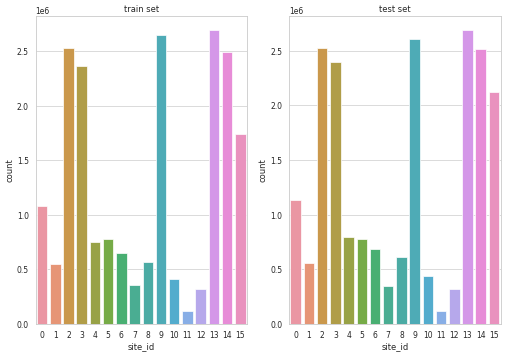

In [44]:
# Plotting the number of site ids to check for both the datafrmes
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.countplot(data=df_train, x='site_id', ax=axes[0]).set(title='train set')
sns.countplot(data=df_test, x='site_id', ax=axes[1]).set(title='test set')

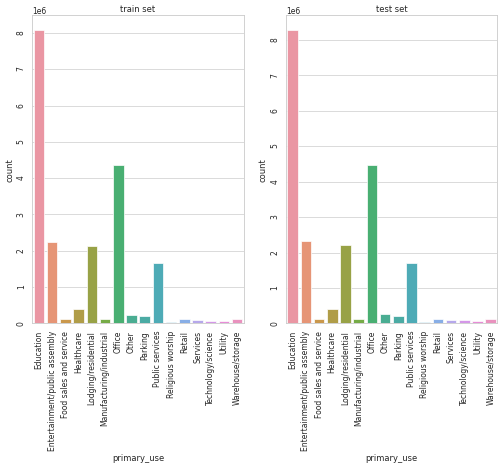

In [45]:
# Lets plote the both dataframes to check the match
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.countplot(data=df_train, x='primary_use', ax=axes[0]).set(title='train set')
axes[0].tick_params(labelrotation=90);
sns.countplot(data=df_test, x='primary_use', ax=axes[1]).set(title='test set')
axes[1].tick_params(labelrotation=90);

Hence we can observe similar locations for the bith datasets.
Now we can apply models to it.